In [5]:
from matplotlib.lines import lineStyles
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('클래스 레이블 : ', np.unique(y))



클래스 레이블 :  [0 1 2]


In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
# startify = 레이블 계층 비율 맞추기

In [7]:
print('y의 레이블 카운트 : ', np.bincount(y))

print('y_train의 레이블 카운트 : ', np.bincount(y_train))

print('y_test의 레이블 카운트 : ', np.bincount(y_test))

y의 레이블 카운트 :  [50 50 50]
y_train의 레이블 카운트 :  [35 35 35]
y_test의 레이블 카운트 :  [15 15 15]


In [8]:
from sklearn.preprocessing import StandardScaler # 표준화 작업
sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [10]:
y_pred = ppn.predict(X_test_std)
print(f'잘못 분류된 샘플 개수 : {(y_test != y_pred).sum()}' )

잘못 분류된 샘플 개수 : 1


In [11]:
from sklearn.metrics import accuracy_score

print(f'정확도 {accuracy_score(y_test, y_pred):.3f}')

정확도 0.978


In [12]:
print(f'정확도 : {ppn.score(X_test_std, y_test):.3f}')

정확도 : 0.978


In [13]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min , x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min , x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.3, cmap =cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c=colors[idx],
                    marker= markers[idx], label = cl,
                    edgecolor='black')
    if test_idx:
        X_test , y_test = X[test_idx,:], y[test_idx]

        plt.scatter(X_test[:,0], X_test[:,1], facecolors='none',
                    edgecolor = 'black', alpha = 1.0, linewidth = 1,marker = 'o',
                    s= 100, label = 'test set')


/var/folders/9j/llt1791911s7xdgkv76l8gbc0000gn/T/ipykernel_1752/1567546599.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
/var/folders/9j/llt1791911s7xdgkv76l8gbc0000gn/T/ipykernel_1752/833514650.py:8: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/sheen/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


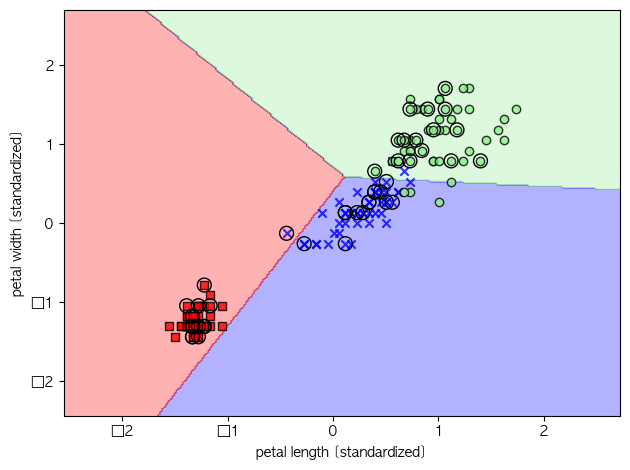

In [22]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()
plt.show()

/var/folders/9j/llt1791911s7xdgkv76l8gbc0000gn/T/ipykernel_1752/3024662721.py:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()


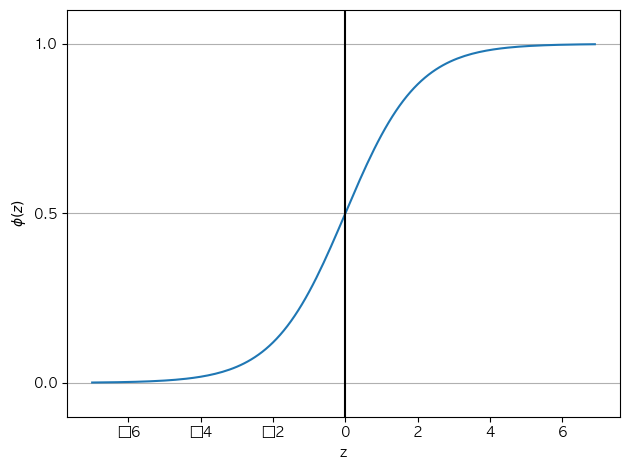

In [23]:
def sigmode(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmode(z)
plt.plot(z,phi_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')


plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

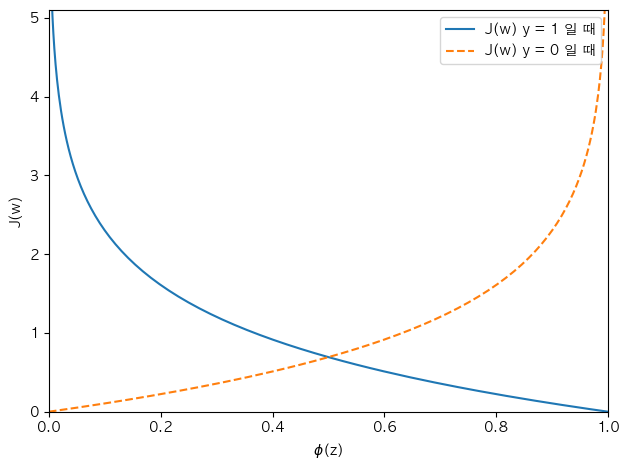

In [24]:
def cost_1(z):
    return - np.log(sigmode(z))
def cost_2(z):
    return - np.log(1 - sigmode(z))
z = np.arange(-10,10,0.1)
phi_z = sigmode(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label = 'J(w) y = 1 일 때')
c2 = [cost_2(x) for x in z]
plt.plot(phi_z,c2,linestyle = '--',label = 'J(w) y = 0 일 때')
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc ='best')
plt.tight_layout()
plt.show()


In [25]:
class LogisticRegressionGd(object):
    def __init__(self, eta = 0.05, n_iter = 100, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size =  1+ X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y- output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            cost = (-y.dot(np.log(output)) - (1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self

    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self,z):
        return 1./ (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

/var/folders/9j/llt1791911s7xdgkv76l8gbc0000gn/T/ipykernel_1752/1567546599.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
/var/folders/9j/llt1791911s7xdgkv76l8gbc0000gn/T/ipykernel_1752/3023687206.py:13: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()


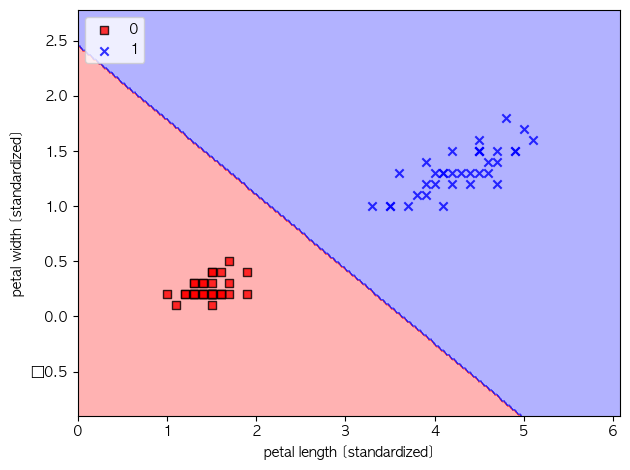

In [26]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGd(eta =0.05, n_iter = 1000, random_state = 1)

lrgd.fit(X_train_01_subset,y_train_01_subset)

plot_decision_regions(X_train_01_subset,y_train_01_subset,classifier = lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

/var/folders/9j/llt1791911s7xdgkv76l8gbc0000gn/T/ipykernel_1752/1567546599.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y = X[y == cl, 1],
/var/folders/9j/llt1791911s7xdgkv76l8gbc0000gn/T/ipykernel_1752/1261682357.py:10: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/Users/sheen/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


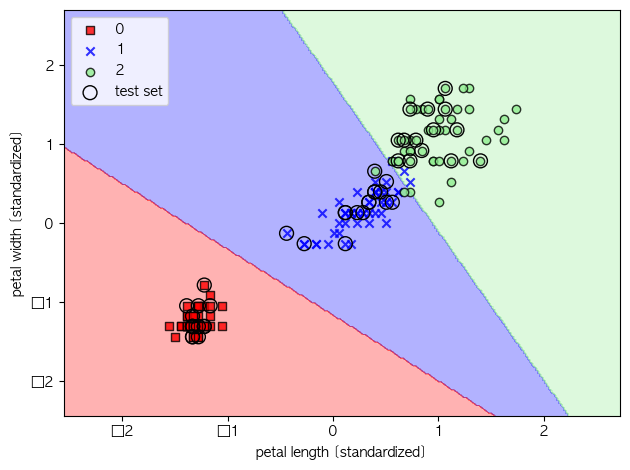

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C =100.0, random_state = 1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [29]:
lr.predict_proba(X_test_std[:3, :])

array([[9.37368464e-13, 3.91458193e-04, 9.99608542e-01],
       [9.93631074e-01, 6.36892585e-03, 1.20730798e-15],
       [9.98707332e-01, 1.29266792e-03, 1.82177043e-17]])

In [30]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis = 1)

array([2, 0, 0])

In [31]:
lr.predict(X_test_std[0, :].reshape(1,-1))

array([2])

/Users/sheen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sheen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sheen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sheen/Library/Python/3.9/lib/python/site-packages/sklearn/li

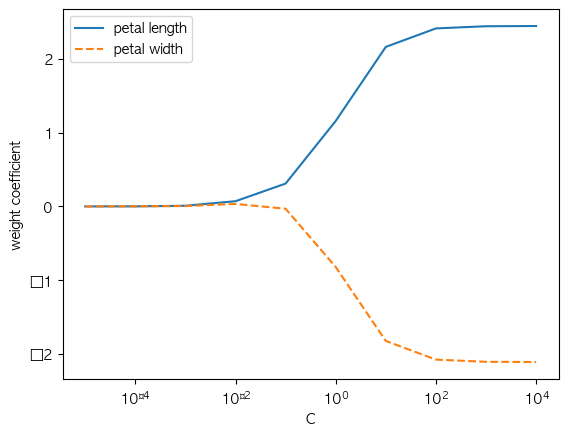

In [32]:
weights, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C = 10. ** c, random_state = 1, multi_class= 'ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label = 'petal length')
plt.plot(params, weights[:, 1], linestyle = '--', label = 'petal width')

plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

In [33]:
import warnings
warnings.filterwarnings("ignore")


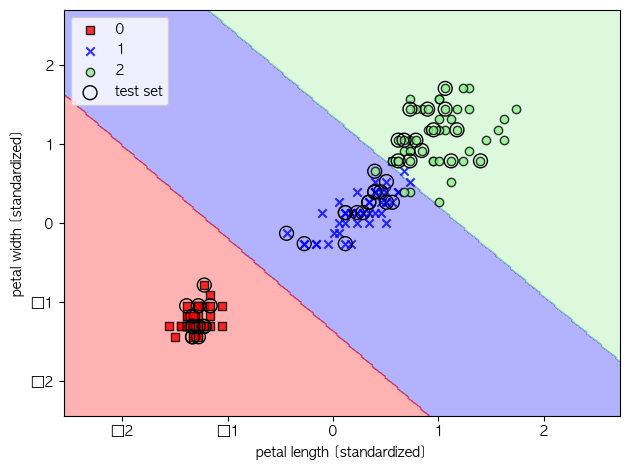

In [34]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C=  1.0, random_state = 1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [35]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss = 'perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')


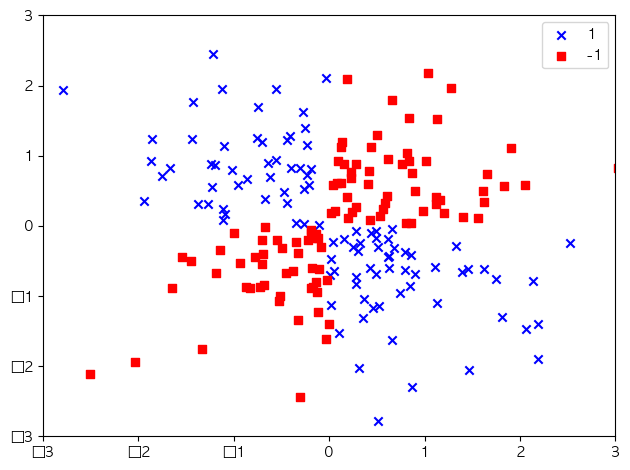

In [36]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0 ,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1,1],
            c = 'b', marker ='x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1,1],
            c=  'r', marker = 's', label = '-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

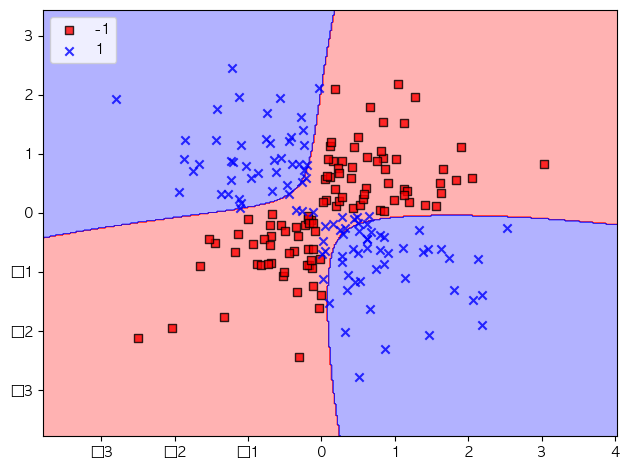

In [37]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.1, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

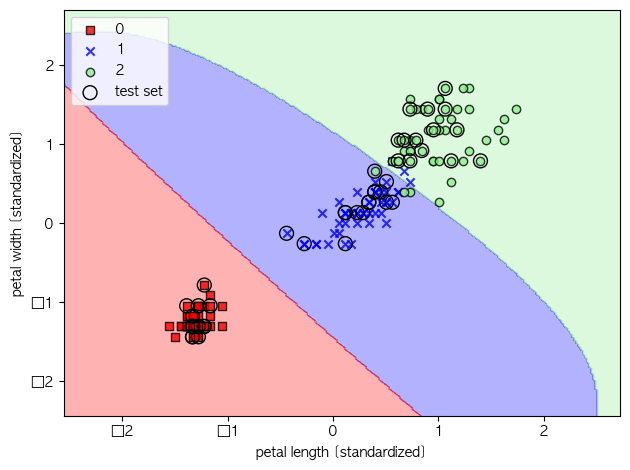

In [38]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.2, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

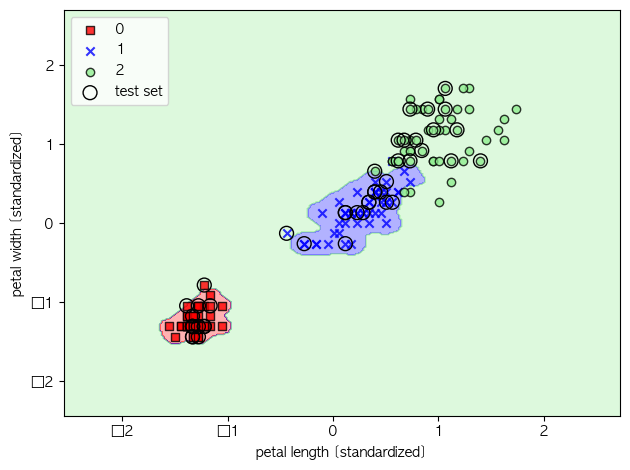

In [39]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 100, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

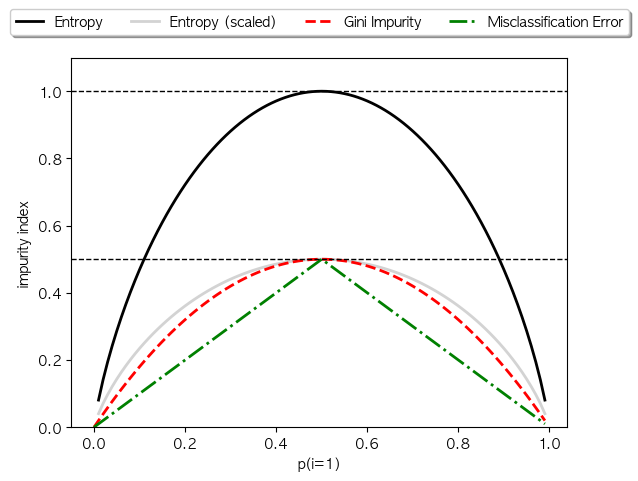

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))
def entropy(p):
    return - p*np.log2(p) - (1 - p) * np.log2((1-p))
def error(p):
    return 1- np.max([p, 1-p])

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err =[error(i) for i in x]

fig = plt.figure()

ax = plt.subplot(111)

for i, lab, ls ,c in zip([ent,sc_ent,gini(x),err],
    ["Entropy", 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
    ['-','-','--','-.'],
    ['black','lightgray','red','green','cyan']):
    line = ax.plot(x,i,label = lab, linestyle = ls, lw = 2, color = c)

ax.legend(loc = 'upper center', bbox_to_anchor = (0.5,1.15),
          ncol = 5, fancybox = True, shadow = True)
ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
ax.axhline(y = 1, linewidth = 1, color = 'k',linestyle = '--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()



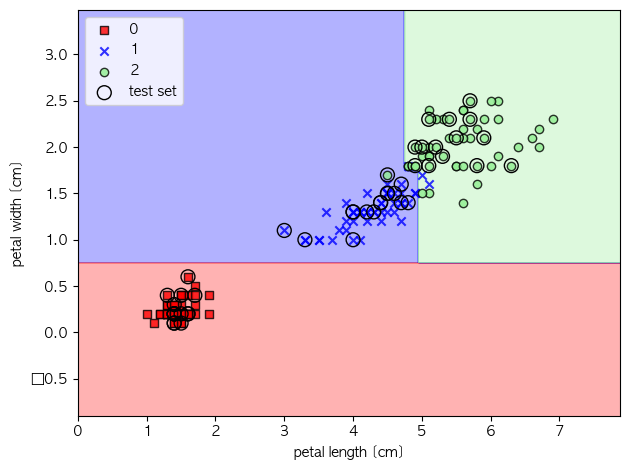

In [41]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)
tree_model = tree.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

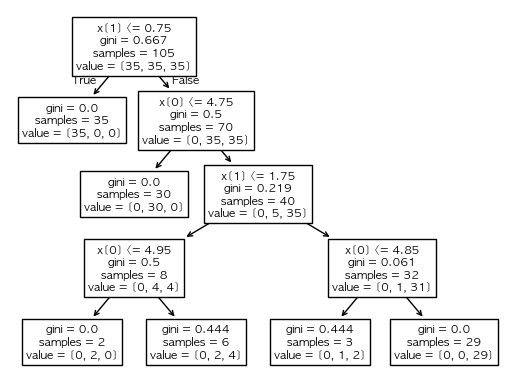

In [42]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

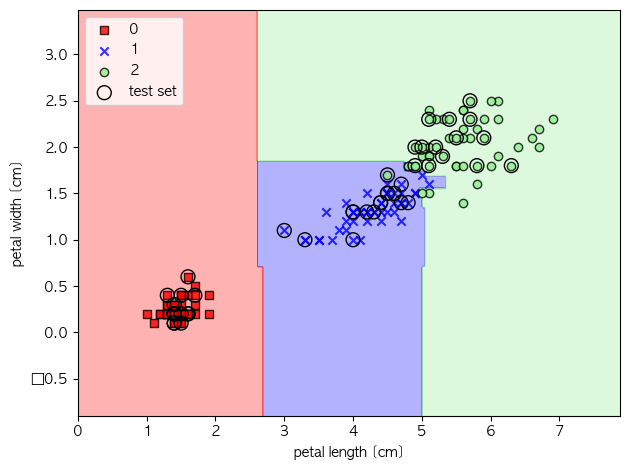

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion= 'gini', n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train,y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel("petal width [cm]")
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

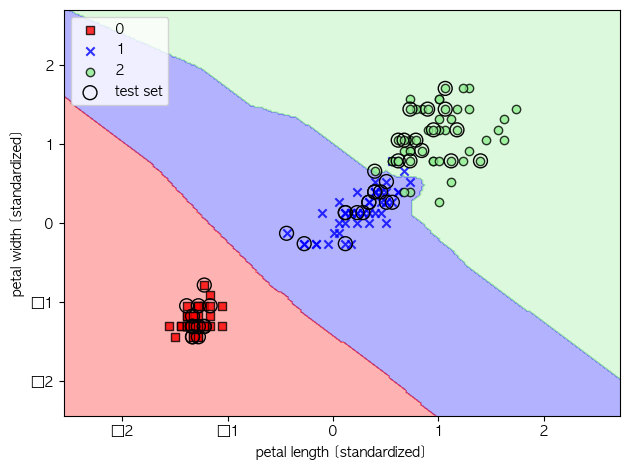

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p = 2, metric = 'minkowski')

knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc ='upper left')
plt.tight_layout()
plt.show()